## **DSA210 TERM PROJECT FALL 2024**





**First data set** is Browsing History.txt. It includes the date, the exact time and the links of the TikToks I watched starting from 23 June 2024 until 22 December 2024. Using the time information in this file, I calculated my daily TikTok screen time in minutes.

In [105]:
from datetime import datetime, timedelta
from collections import defaultdict
from google.colab import files
from IPython.core.display import display, HTML

uploaded = files.upload()

file_path = 'Browsing History.txt'

with open(file_path, 'r') as file:
    lines = file.readlines()

timestamps = []
for line in lines:
    if line.startswith('Date:'):
        timestamp = line.split('Date: ')[1].strip()
        timestamps.append(datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S'))

daily_screen_time = defaultdict(list)
for ts in timestamps:
    date = ts.date()
    daily_screen_time[date].append(ts)

if timestamps:
    start_date = min(ts.date() for ts in timestamps)
    end_date = max(ts.date() for ts in timestamps)
else:
    start_date = datetime.now().date()
    end_date = datetime.now().date()

date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

gap_threshold = timedelta(minutes=5)
daily_screen_duration = {date: timedelta(0) for date in date_range}

for date, times in daily_screen_time.items():
    times = sorted(times)
    total_duration = timedelta(0)
    for i in range(1, len(times)):
        gap = times[i] - times[i - 1]
        if gap <= gap_threshold:
            total_duration += gap
    daily_screen_duration[date] = total_duration


results = []
for date in date_range:
    duration = daily_screen_duration[date]
    hours, remainder = divmod(duration.total_seconds(), 3600)
    minutes, seconds = divmod(remainder, 60)
    total_minutes = round(duration.total_seconds() / 60, 2)
    results.append((date, f"{int(hours)}h {int(minutes)}m {int(seconds)}s", total_minutes))

import pandas as pd
results_df = pd.DataFrame(results, columns=["Date", "Screen Time", "Screen Time (Minutes)"])

custom_css = """
<style>
    td, th {
        text-align: center !important; /* Center-align text */
        vertical-align: middle !important; /* Center-align vertically */
        padding: 5px !important; /* Reduce padding for smaller row height */
    }
</style>
"""
display(HTML(custom_css))

from google.colab import data_table
data_table.DataTable(results_df)


Saving Browsing History.txt to Browsing History (1).txt


,Date,Screen Time,Screen Time (Minutes)
0,2024-06-22,0h 16m 1s,16.02
1,2024-06-23,0h 34m 23s,34.38
2,2024-06-24,0h 15m 21s,15.35
3,2024-06-25,0h 41m 32s,41.53
4,2024-06-26,0h 51m 32s,51.53
...,...,...,...
179,2024-12-18,0h 28m 31s,28.52
180,2024-12-19,0h 36m 31s,36.52
181,2024-12-20,0h 27m 48s,27.80
182,2024-12-21,0h 13m 59s,13.98


My **second data set** is from the iPhone Health app, showing my daily steps taking starting from 23 June 2024 until 22 December 2024.



In [106]:
from datetime import date, timedelta
import pandas as pd
from google.colab import data_table
from IPython.core.display import display, HTML


walking_distances = [
    1436, 6841, 3005, 8536, 3855, 8409, 2261, 2058, 2737, 7714, 5419, 594, 3600, 6285, 2823, 4365, 8349, 4775, 6857, 16298,
    7682, 2856, 11049, 18200, 20329, 20916, 9144, 3847, 1229, 3562, 6767, 4120, 1425, 8682, 3788, 1100, 444, 6261, 4318,
    5813, 7925, 2836, 5759, 5931, 3984, 3572, 6760, 3075, 4646, 1668, 2464, 3230, 8224, 5001, 293, 8558, 4276, 2038, 7016,
    6756, 6668, 5393, 6036, 7258, 951, 4284, 4645, 5784, 5874, 8395, 5513, 6119, 14795, 7696, 3533, 7487, 3295, 1771, 11930,
    9171, 6543, 4731, 4772, 5562, 2309, 9893, 5879, 3784, 5674, 3996, 11131, 6887, 4766, 4348, 2934, 5645, 7411, 8458, 3609,
    3343, 7085, 7844, 2690, 3436, 4326, 5921, 755, 3701, 2075, 1982, 5681, 1771, 9365, 6594, 5641, 8037, 4316, 8945, 4790,
    4770, 6744, 6166, 8742, 6254, 6017, 5475, 13147, 13696, 5451, 7666, 7839, 5870, 4308, 3581, 3442, 8063, 5265, 11620, 7362,
    5954, 4608, 6103, 4444, 3264, 5043, 5460, 5591, 3316, 5977, 8802, 1091, 9740, 2468, 5624, 7025, 4659, 3764, 7815, 6190, 3953,
    3408, 7006, 5926, 4459, 4608, 4589, 8676, 4859, 5454, 5779, 4826, 2738, 1612, 553, 1463, 3977, 1283, 1651, 1872, 6949, 1783, 9976, 4290, 640
]
reversed=walking_distances[::-1]

start_date = date(2024, 6, 22)

dates = [start_date + timedelta(days=i) for i in range(len(reversed))]

walking_data = list(zip(dates, reversed))
walking_df = pd.DataFrame(walking_data, columns=["Date", "Steps Taken"])

print(walking_df)

custom_css = """
<style>
    td, th {
        text-align: center !important; /* Center-align text */
        vertical-align: middle !important; /* Center-align vertically */
        padding: 5px !important; /* Reduce padding for smaller row height */
    }
</style>
"""
display(HTML(custom_css))

data_table.DataTable(walking_df)


           Date  Steps Taken
0    2024-06-22          640
1    2024-06-23         4290
2    2024-06-24         9976
3    2024-06-25         1783
4    2024-06-26         6949
..          ...          ...
179  2024-12-18         3855
180  2024-12-19         8536
181  2024-12-20         3005
182  2024-12-21         6841
183  2024-12-22         1436

[184 rows x 2 columns]


,Date,Steps Taken
0,2024-06-22,640
1,2024-06-23,4290
2,2024-06-24,9976
3,2024-06-25,1783
4,2024-06-26,6949
...,...,...
179,2024-12-18,3855
180,2024-12-19,8536
181,2024-12-20,3005
182,2024-12-21,6841


# **Data Frame Combining Daily Steps Taken and Daily TikTok Screen Time**

In [110]:
df_merged = df_merged[['Date', 'Steps Taken', 'Screen Time (Minutes)']]


custom_css = """
<style>
    td, th {
        text-align: center !important;
        vertical-align: middle !important;
        padding: 5px !important;
    }
</style>
"""
display(HTML(custom_css))

data_table.DataTable(df_merged)


,Date,Steps Taken,Screen Time (Minutes)
0,2024-06-22,640,16.02
1,2024-06-23,4290,34.38
2,2024-06-24,9976,15.35
3,2024-06-25,1783,41.53
4,2024-06-26,6949,51.53
...,...,...,...
179,2024-12-18,3855,28.52
180,2024-12-19,8536,36.52
181,2024-12-20,3005,27.80
182,2024-12-21,6841,13.98


In [111]:
df_merged.describe()


,Date,Steps Taken,Screen Time (Minutes)
count,184,184.000000,184.000000
mean,2024-09-21 12:00:00,5574.646739,47.902337
min,2024-06-22 00:00:00,293.000000,0.000000
25%,2024-08-06 18:00:00,3510.250000,20.427500
50%,2024-09-21 12:00:00,5406.000000,39.850000
75%,2024-11-06 06:00:00,7008.500000,67.732500
max,2024-12-22 00:00:00,20916.000000,186.100000
std,NaN,3351.472930,36.293690


# **Histogram of Daily TikTok Screen Time:**

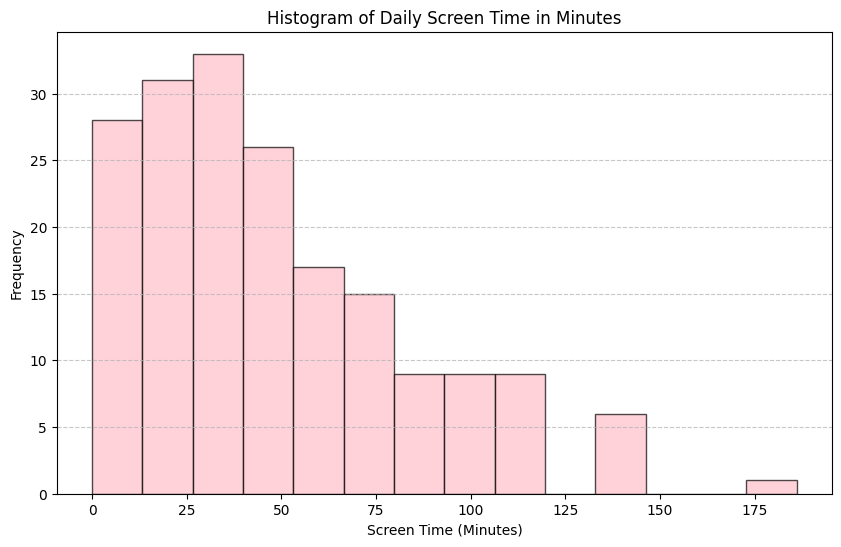

In [112]:
import matplotlib.pyplot as plt

screen_time_minutes = results_df["Screen Time (Minutes)"]

plt.figure(figsize=(10, 6))
plt.hist(screen_time_minutes, bins=14, color='pink', alpha=0.7, edgecolor='black')
plt.title('Histogram of Daily Screen Time in Minutes')
plt.xlabel('Screen Time (Minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# **Histogram of Daily Steps Taken**




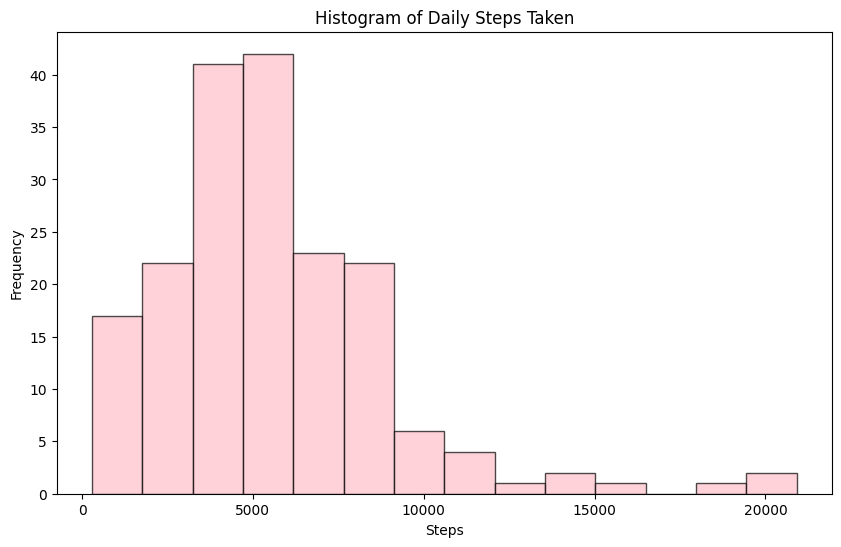

In [113]:
walking_distances=[1436, 6841, 3005, 8536, 3855, 8409, 2261, 2058, 2737, 7714, 5419, 594, 3600, 6285, 2823, 4365, 8349, 4775, 6857, 16298,
                   7682, 2856, 11049, 18200, 20329, 20916, 9144, 3847, 1229, 3562, 6767, 4120, 1425, 8682, 3788, 1100, 444, 6261, 4318,
                   5813, 7925, 2836, 5759, 5931, 3984, 3572, 6760, 3075, 4646, 1668, 2464, 3230, 8224, 5001, 293, 8558, 4276, 2038, 7016,
                   6756, 6668, 5393, 6036, 7258, 951, 4284, 4645,5784, 5874, 8395, 5513, 6119, 14795, 7696, 3533, 7487, 3295, 1771, 11930,
                   9171, 6543, 4731, 4772, 5562, 2309, 9893, 5879, 3784, 5674, 3996, 11131, 6887, 4766, 4348, 2934, 5645, 7411, 8458, 3609,
                   3343, 7085, 7844, 2690, 3436, 4326, 5921, 755, 3701, 2075, 1982, 5681, 1771, 9365, 6594, 5641, 8037, 4316, 8945, 4790,
                   4770, 6744, 6166, 8742, 6254, 6017, 5475, 13147, 13696, 5451, 7666, 7839, 5870, 4308, 3581, 3442, 8063, 5265, 11620, 7362,
                   5954, 4608, 6103, 4444, 3264, 5043, 5460, 5591, 3316, 5977, 8802, 1091, 9740, 2468, 5624, 7025, 4659, 3764, 7815, 6190, 3953,
                   3408, 7006, 5926, 4459, 4608, 4589, 8676, 4859, 5454, 5779, 4826, 2738, 1612, 553, 1463, 3977, 1283, 1651, 1872, 6949, 1783, 9976, 4290, 640]
steps=walking_distances.reverse()
import matplotlib.pyplot as plt

reversed=walking_distances[::-1]

plt.figure(figsize=(10, 6))
plt.hist(reversed, bins=14, color='pink', edgecolor='black', alpha=0.7)

plt.title("Histogram of Daily Steps Taken")
plt.xlabel("Steps")
plt.ylabel("Frequency")

plt.show()



# **Boxplots of Steps Taken and Screen Time**




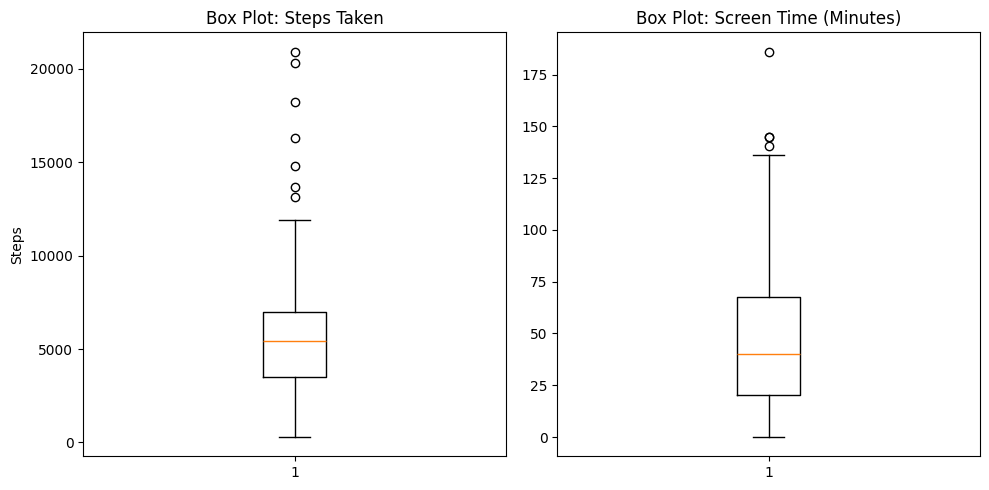

In [114]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].boxplot(df_merged['Steps Taken'])
axes[0].set_title('Box Plot: Steps Taken')
axes[0].set_ylabel('Steps')

axes[1].boxplot(df_merged['Screen Time (Minutes)'])
axes[1].set_title('Box Plot: Screen Time (Minutes)')

plt.tight_layout()
plt.show()


**Detecting Outliers in My Data Sets**

In [115]:
def detect_outliers_iqr(data, column_name):
    """
    data: DataFrame containing your data
    column_name: The numeric column where you want to detect outliers
    Returns: DataFrame rows that are considered outliers in column_name
             based on the IQR method (1.5 * IQR rule).
    """
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers

steps_outliers = detect_outliers_iqr(df_merged, 'Steps Taken')
print("Steps Outliers:")
print(steps_outliers[['Date', 'Steps Taken']])


screen_outliers = detect_outliers_iqr(df_merged, 'Screen Time (Minutes)')
print("\nScreen Time Outliers:")
print(screen_outliers[['Date', 'Screen Time (Minutes)']])


Steps Outliers:
          Date  Steps Taken
56  2024-08-17        13696
57  2024-08-18        13147
111 2024-10-11        14795
158 2024-11-27        20916
159 2024-11-28        20329
160 2024-11-29        18200
164 2024-12-03        16298

Screen Time Outliers:
          Date  Screen Time (Minutes)
23  2024-07-15                 186.10
133 2024-11-02                 144.87
154 2024-11-23                 140.55
155 2024-11-24                 144.93


# **Time Series Analysis of Daily Steps Taken and TikTok Screen Time**

In [116]:
import pandas as pd

df_merged['Date'] = pd.to_datetime(df_merged['Date'])
df_merged = df_merged.sort_values(by='Date')


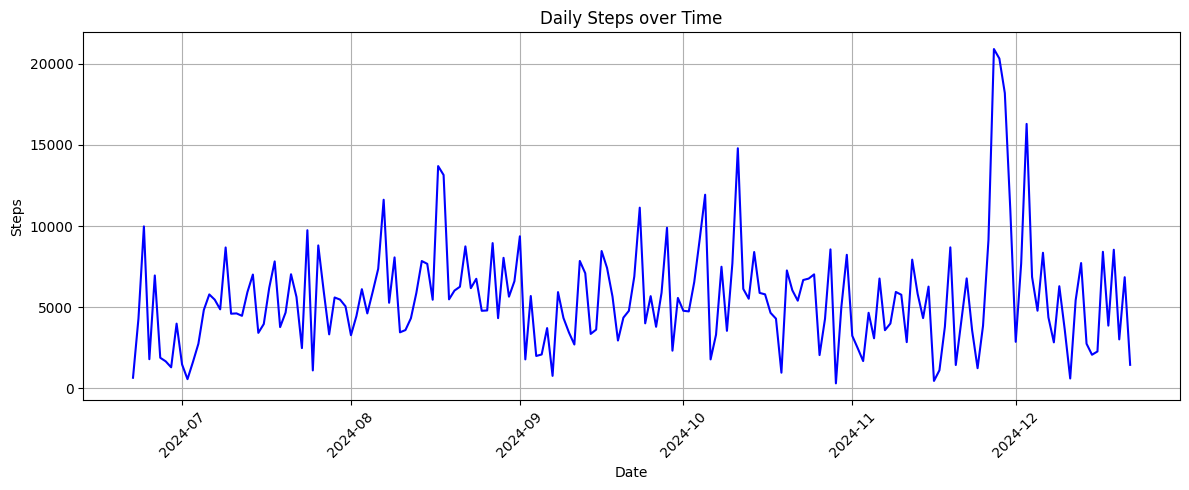

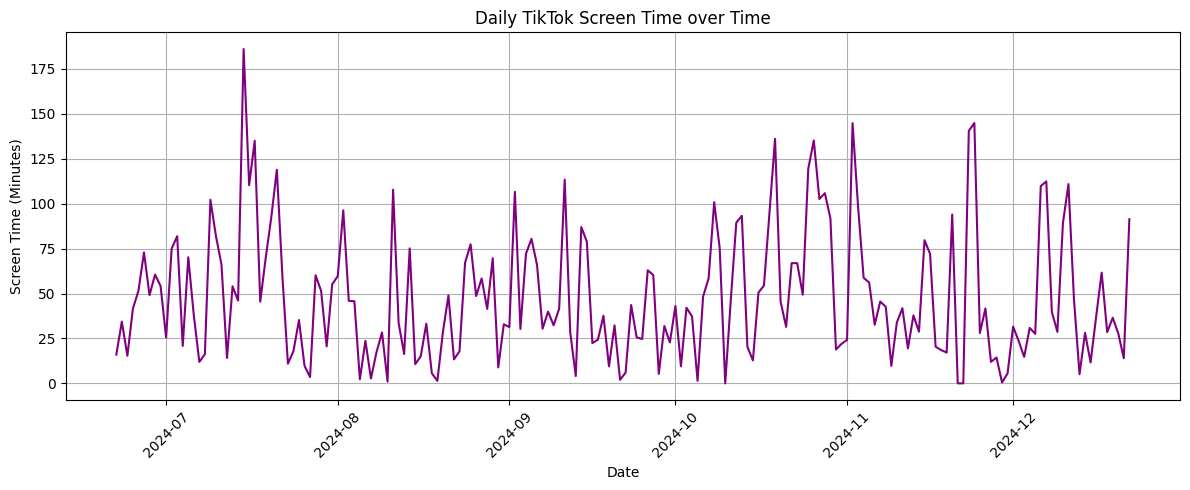

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.plot(
    df_merged['Date'],
    df_merged['Steps Taken'],
    label='Daily Steps',
    color='blue'
)
plt.title('Daily Steps over Time')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(
    df_merged['Date'],
    df_merged['Screen Time (Minutes)'],
    label='Daily Screen Time',
    color='purple'
)
plt.title('Daily TikTok Screen Time over Time')
plt.xlabel('Date')
plt.ylabel('Screen Time (Minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


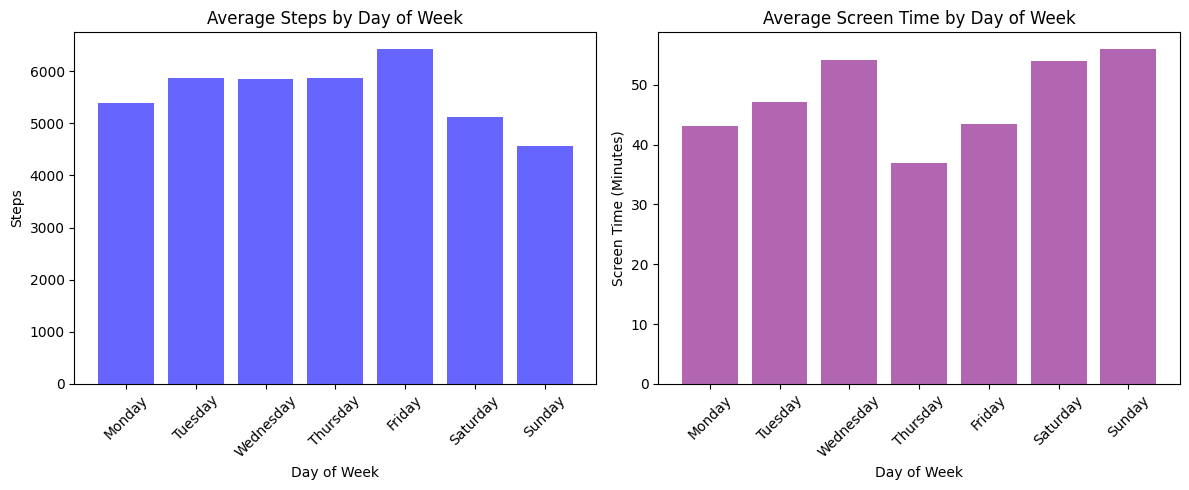

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

df_merged['Date'] = pd.to_datetime(df_merged['Date'])

df_merged['DayOfWeek'] = df_merged['Date'].dt.day_name()

df_dow = df_merged.groupby('DayOfWeek').agg({
    'Steps Taken': 'mean',
    'Screen Time (Minutes)': 'mean'
}).reset_index()

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_dow['DayOfWeek'] = pd.Categorical(df_dow['DayOfWeek'], categories=day_order, ordered=True)
df_dow = df_dow.sort_values('DayOfWeek').reset_index(drop=True)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(df_dow['DayOfWeek'], df_dow['Steps Taken'], color='blue', alpha=0.6)
axes[0].set_title('Average Steps by Day of Week')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Steps')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(df_dow['DayOfWeek'], df_dow['Screen Time (Minutes)'], color='purple', alpha=0.6)
axes[1].set_title('Average Screen Time by Day of Week')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Screen Time (Minutes)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [119]:
df_merged['YearMonth'] = df_merged['Date'].dt.to_period('M')

monthly_data = df_merged.groupby('YearMonth').agg({
    'Steps Taken': 'mean',
    'Screen Time (Minutes)': 'mean'
}).reset_index()

monthly_data['YearMonth'] = monthly_data['YearMonth'].astype(str)

print(monthly_data.head())


  YearMonth  Steps Taken  Screen Time (Minutes)
0   2024-06  3602.333333              43.944444
1   2024-07  4918.516129              57.648387
2   2024-08  6586.258065              36.610000
3   2024-09  5075.366667              41.798000
4   2024-10  5961.483871              60.365161


# **Average TikTok ScreenTime by Months**

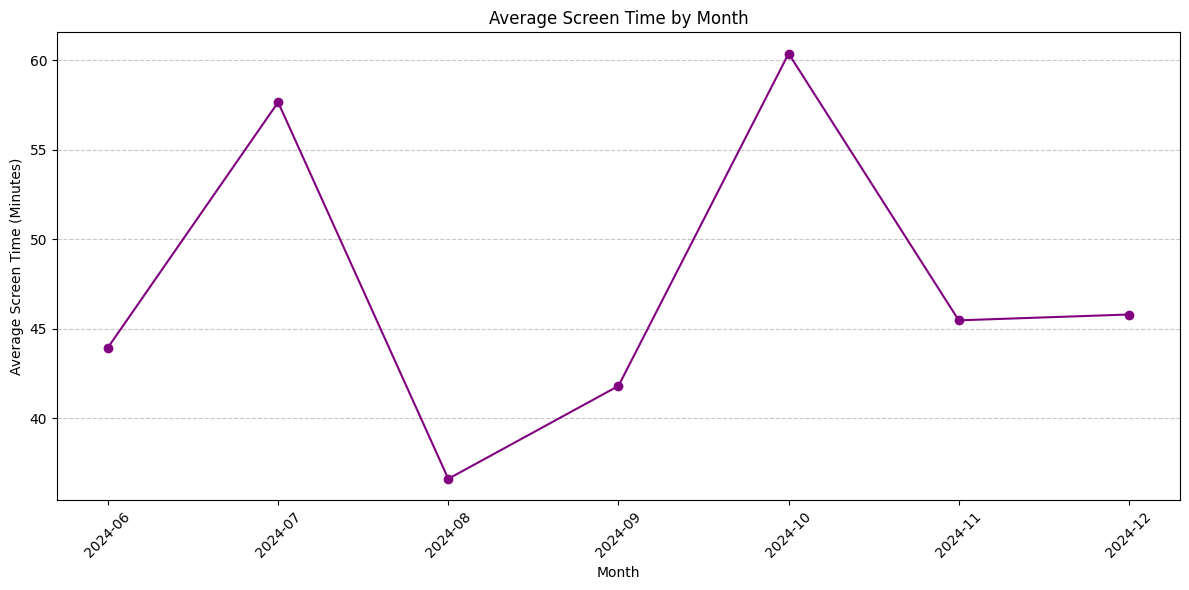

In [120]:
import matplotlib.pyplot as plt

results_df['Date'] = pd.to_datetime(results_df['Date'])

results_df['Year-Month'] = results_df['Date'].dt.to_period('M')

monthly_avg = results_df.groupby('Year-Month')['Screen Time (Minutes)'].mean()

monthly_avg_df = monthly_avg.reset_index()
monthly_avg_df['Year-Month'] = monthly_avg_df['Year-Month'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_df['Year-Month'], monthly_avg_df['Screen Time (Minutes)'], marker='o', color='purple')
plt.title('Average Screen Time by Month')
plt.xlabel('Month')
plt.ylabel('Average Screen Time (Minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **Average Step Count by Months**

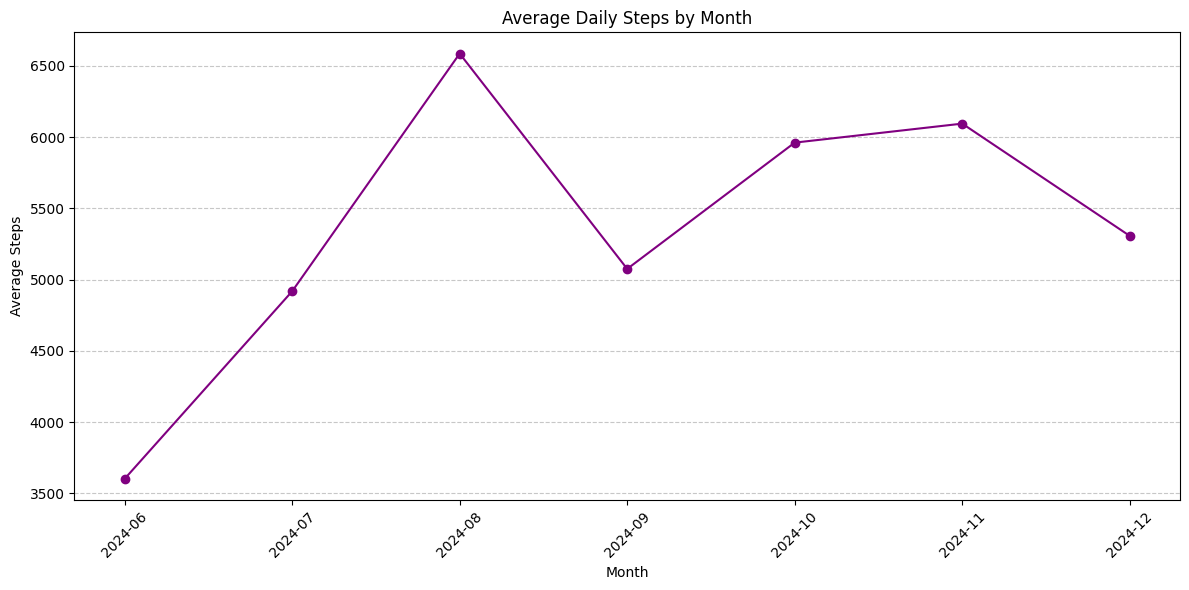

In [123]:
import matplotlib.pyplot as plt

walking_df['Date'] = pd.to_datetime(walking_df['Date'])

walking_df['Year-Month'] = walking_df['Date'].dt.to_period('M')

monthly_avg = walking_df.groupby('Year-Month')['Steps Taken'].mean()

monthly_avg_df = monthly_avg.reset_index()
monthly_avg_df['Year-Month'] = monthly_avg_df['Year-Month'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_df['Year-Month'], monthly_avg_df['Steps Taken'], marker='o', color='purple')
plt.title('Average Daily Steps by Month')
plt.xlabel('Month')
plt.ylabel('Average Steps')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-126-aa9a956cfd7c>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(monthly_steps['Year-Month'], rotation=45)


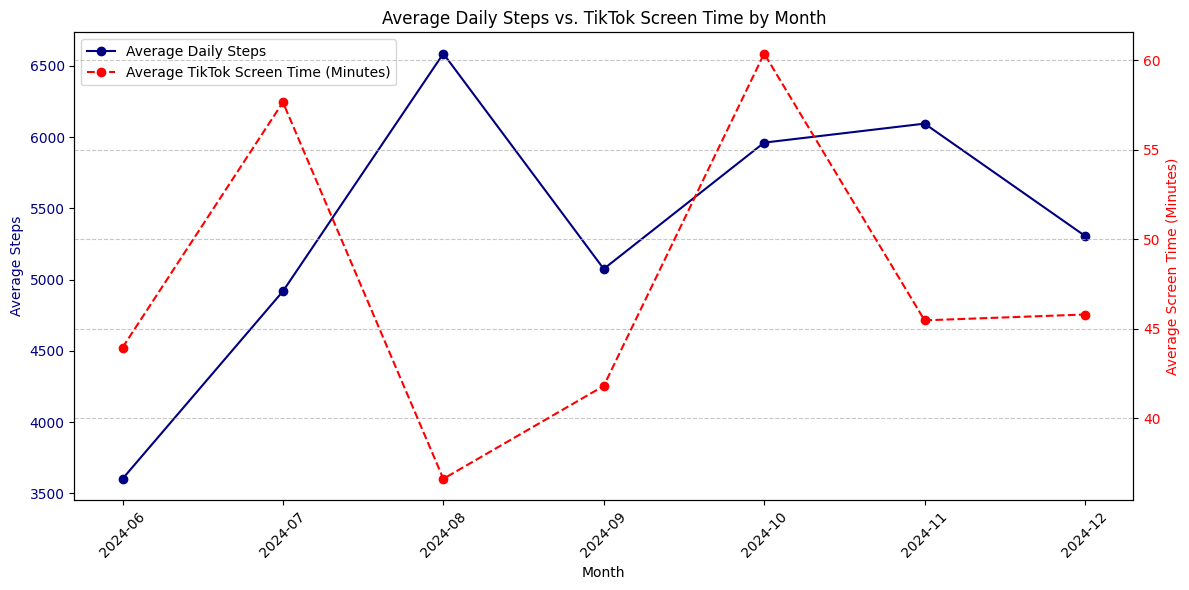

In [126]:
import matplotlib.pyplot as plt
import pandas as pd


walking_df['Date'] = pd.to_datetime(walking_df['Date'])
walking_df['Year-Month'] = walking_df['Date'].dt.to_period('M')
monthly_steps = (
    walking_df.groupby('Year-Month')['Steps Taken']
    .mean()
    .reset_index()
)
monthly_steps['Year-Month'] = monthly_steps['Year-Month'].astype(str)


results_df['Date'] = pd.to_datetime(results_df['Date'])
results_df['Year-Month'] = results_df['Date'].dt.to_period('M')
monthly_screen_time = (
    results_df.groupby('Year-Month')['Screen Time (Minutes)']
    .mean()
    .reset_index()
)
monthly_screen_time['Year-Month'] = monthly_screen_time['Year-Month'].astype(str)


fig, ax1 = plt.subplots(figsize=(12, 6))


color_steps = 'navy'
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Steps', color=color_steps)
ax1.plot(
    monthly_steps['Year-Month'],
    monthly_steps['Steps Taken'],
    marker='o',
    color=color_steps,
    label='Average Daily Steps'
)
ax1.tick_params(axis='y', labelcolor=color_steps)
ax1.set_xticklabels(monthly_steps['Year-Month'], rotation=45)

ax2 = ax1.twinx()
color_screen = 'red'
ax2.set_ylabel('Average Screen Time (Minutes)', color=color_screen)
ax2.plot(
    monthly_screen_time['Year-Month'],
    monthly_screen_time['Screen Time (Minutes)'],
    marker='o',
    color=color_screen,
    linestyle='--',
    label='Average TikTok Screen Time (Minutes)'
)
ax2.tick_params(axis='y', labelcolor=color_screen)


plt.title('Average Daily Steps vs. TikTok Screen Time by Month')
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()


# **Dot Plot of Daily Steps Taken with Trendline**

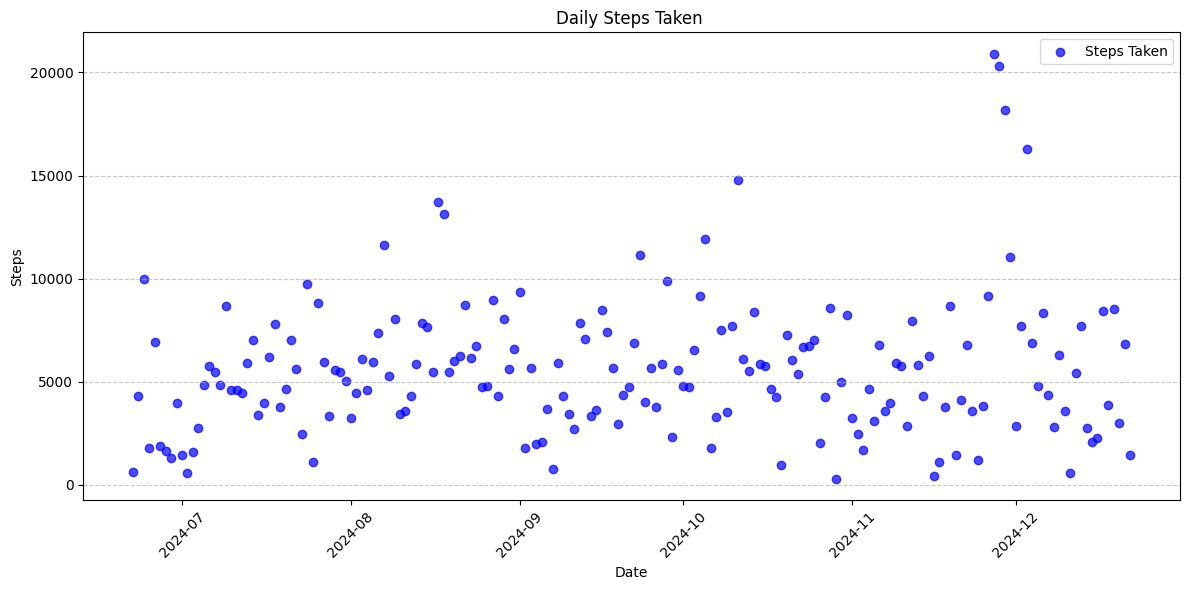

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_merged['Date'] = pd.to_datetime(df_merged['Date'], errors='coerce')
df_merged.sort_values('Date', inplace=True)
df_merged.reset_index(drop=True, inplace=True)

df_merged['Date_ordinal'] = df_merged['Date'].apply(lambda x: x.toordinal())


coeff_steps = np.polyfit(df_merged['Date_ordinal'], df_merged['Steps Taken'], 1)
trend_steps = np.poly1d(coeff_steps)


df_merged['Steps_Trend'] = trend_steps(df_merged['Date_ordinal'])


plt.figure(figsize=(12, 6))
plt.scatter(
    df_merged['Date'],
    df_merged['Steps Taken'],
    color='blue', alpha=0.7, label='Steps Taken'
)


plt.title('Daily Steps Taken ')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()



# **Dot Plot of Daily TikTok Screen Time**


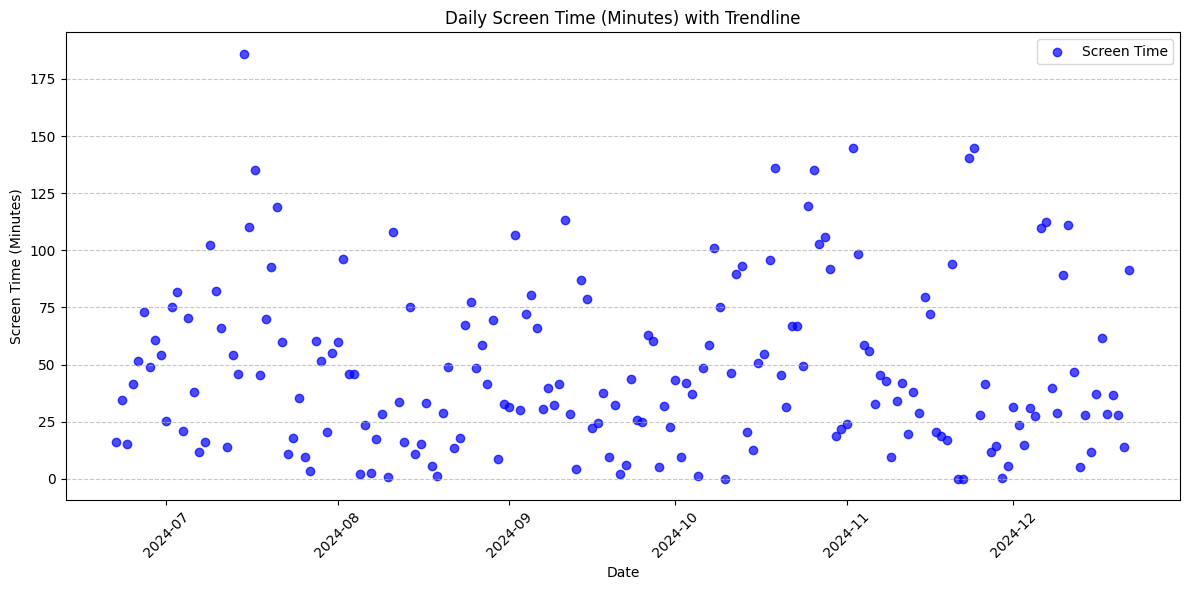

In [128]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_merged['Date'] = pd.to_datetime(df_merged['Date'], errors='coerce')
df_merged.sort_values('Date', inplace=True)
df_merged.reset_index(drop=True, inplace=True)

coeff_screen = np.polyfit(
    df_merged['Date_ordinal'],
    df_merged['Screen Time (Minutes)'],
    1
)
trend_screen = np.poly1d(coeff_screen)


df_merged['Screen_Trend'] = trend_screen(df_merged['Date_ordinal'])

plt.figure(figsize=(12, 6))
plt.scatter(
    df_merged['Date'],
    df_merged['Screen Time (Minutes)'],
    color='blue', alpha=0.7, label='Screen Time'
)


plt.title('Daily Screen Time (Minutes) with Trendline')
plt.xlabel('Date')
plt.ylabel('Screen Time (Minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


# **Scatter Plot of Daily Steps Taken vs Daily TikTok Screen Time**

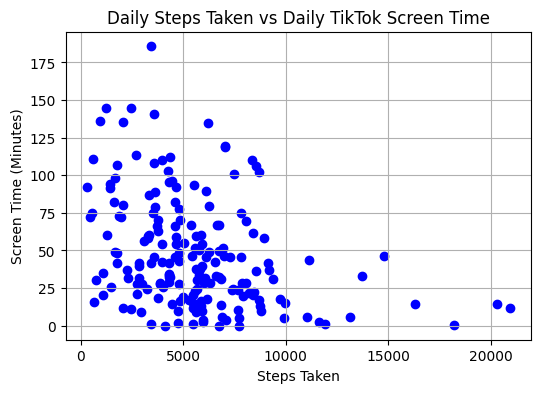

In [129]:
plt.figure(figsize=(6, 4))
plt.scatter(df_merged['Steps Taken'], df_merged['Screen Time (Minutes)'], color='blue')
plt.title('Daily Steps Taken vs Daily TikTok Screen Time')
plt.xlabel('Steps Taken')
plt.ylabel('Screen Time (Minutes)')
plt.grid(True)
plt.show()



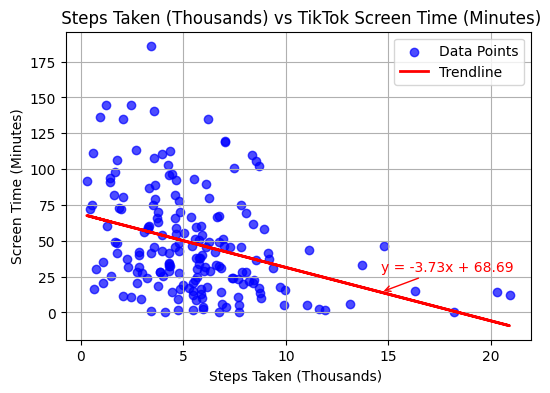

In [130]:
import numpy as np
import matplotlib.pyplot as plt



df_merged['Steps_in_thousands'] = df_merged['Steps Taken'] / 1000


x = df_merged['Steps_in_thousands']
y = df_merged['Screen Time (Minutes)']

# slope will be “minutes per thousand steps” instead of “minutes per single step.”


plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='blue', alpha=0.7, label='Data Points')

coeffs = np.polyfit(x, y, 1)
trend_func = np.poly1d(coeffs)


plt.plot(x, trend_func(x), color='red', linewidth=2, label='Trendline')

m, b = coeffs[0], coeffs[1]
equation_text = f'y = {m:.2f}x + {b:.2f}'


plt.annotate(
    equation_text,
    xy=(max(x)*0.7, trend_func(max(x)*0.7)),
    xytext=(0, 15),
    textcoords='offset points',
    arrowprops=dict(arrowstyle='->', color='red'),
    fontsize=10, color='red'
)



plt.title(' Steps Taken (Thousands) vs TikTok Screen Time (Minutes)')
plt.xlabel('Steps Taken (Thousands) ')
plt.ylabel('Screen Time (Minutes)')
plt.grid(True)
plt.legend()
plt.show()


# **Calculating Correlation Coefficient**

In [131]:
import pandas as pd

correlation_value = df_merged[['Steps Taken', 'Screen Time (Minutes)']].corr()

print(correlation_value)


                       Steps Taken  Screen Time (Minutes)
Steps Taken               1.000000              -0.344267
Screen Time (Minutes)    -0.344267               1.000000


**Excluding the exam dates due to unusual behavior, and calculating the correlation coefficient again**

In [132]:
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

#Define exam dates
excluded_dates = [
    '2024-11-05',
    '2024-11-10',
    '2024-11-14',
    '2024-11-18',
    '2024-11-22',
    '2024-12-17'
]

# Exclude rows with exam dates
df_filtered = df_merged[~df_merged['Date'].isin(excluded_dates)]

#Calculate correlation on filtered data
corr_val = df_filtered['Steps Taken'].corr(df_filtered['Screen Time (Minutes)'])
print("Correlation (excluding exam dates):", corr_val)


Correlation (excluding exam dates): -0.35055551295996734


<ipython-input-132-2cb2ab674395>:14: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_filtered = df_merged[~df_merged['Date'].isin(excluded_dates)]


**Since I have included both the summer holiday and the school time in my data set, I want to see if there are any differences between those periods or not.**

Correlation (Summer Holiday, 2024-06-22 to 2024-09-22): -0.283064730403318
Correlation (School Time, 2024-09-23 to 2024-12-22): -0.39842027325548957


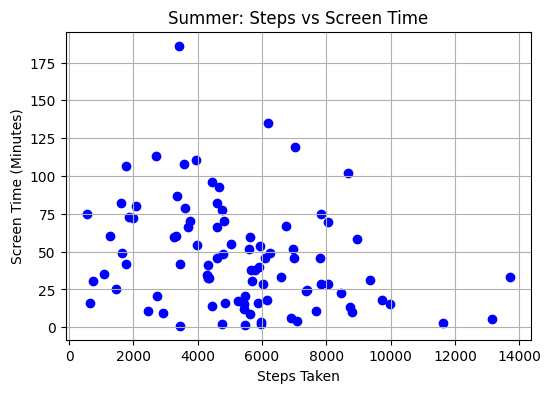

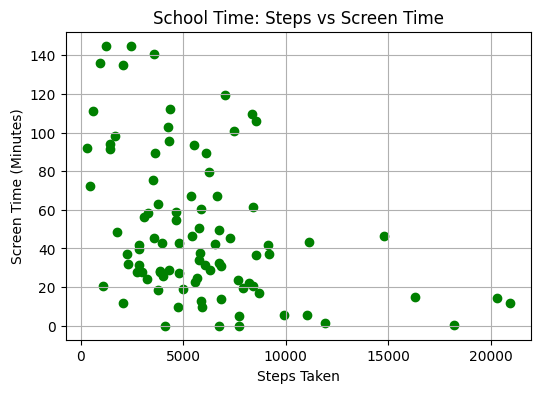

In [134]:
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
summer_start = pd.to_datetime('2024-06-22')
summer_end = pd.to_datetime('2024-09-22')
school_start = pd.to_datetime('2024-09-23')
school_end = pd.to_datetime('2024-12-22')
# Summer subset: 2024-06-22 to 2024-09-22
df_summer = df_merged[
    (df_merged['Date'] >= summer_start) &
    (df_merged['Date'] <= summer_end)
]

# School subset: 2024-09-23 to 2024-12-22
df_school = df_merged[
    (df_merged['Date'] >= school_start) &
    (df_merged['Date'] <= school_end)
]
# Correlation for Summer
corr_summer = df_summer['Steps Taken'].corr(df_summer['Screen Time (Minutes)'])

# Correlation for School
corr_school = df_school['Steps Taken'].corr(df_school['Screen Time (Minutes)'])

print(f"Correlation (Summer Holiday, 2024-06-22 to 2024-09-22): {corr_summer}")
print(f"Correlation (School Time, 2024-09-23 to 2024-12-22): {corr_school}")
import matplotlib.pyplot as plt

# --- Summer Scatter Plot ---
plt.figure(figsize=(6, 4))
plt.scatter(df_summer['Steps Taken'], df_summer['Screen Time (Minutes)'], color='blue')
plt.title('Summer: Steps vs Screen Time')
plt.xlabel('Steps Taken')
plt.ylabel('Screen Time (Minutes)')
plt.grid(True)
plt.show()

# --- School Scatter Plot ---
plt.figure(figsize=(6, 4))
plt.scatter(df_school['Steps Taken'], df_school['Screen Time (Minutes)'], color='green')
plt.title('School Time: Steps vs Screen Time')
plt.xlabel('Steps Taken')
plt.ylabel('Screen Time (Minutes)')
plt.grid(True)
plt.show()


**Linear Regression Model**

In [135]:
from sklearn.linear_model import LinearRegression
import numpy as np


X = df_merged[['Screen Time (Minutes)']]
y = df_merged['Steps Taken']


linreg = LinearRegression()
linreg.fit(X, y)


print("Intercept:", linreg.intercept_)
print("Coefficient for Screen Time:", linreg.coef_[0])


df_merged['Predicted Steps'] = linreg.predict(X)


Intercept: 7097.4932221120725
Coefficient for Screen Time: -31.79065114012788


# **Hypothesis Testing and Conclusion**

In [136]:
import scipy.stats as stats
significance_level = 0.05
# x is screen time, y is steps
x = df_merged['Screen Time (Minutes)']
y = df_merged['Steps Taken']


corr_coef, p_value_two_tailed = stats.pearsonr(x, y)

print(f"Correlation Coefficient: {corr_coef:.4f}")

# We define "strong," "moderate," or "weak" thresholds for negative and positive.
if corr_coef <= -0.7:
    print("Strong negative correlation.")
elif -0.7 < corr_coef <= -0.3:
    print("Moderate negative correlation.")
elif -0.3 < corr_coef < 0:
    print("Weak negative correlation.")
elif corr_coef == 0:
    print("No correlation.")
elif 0 < corr_coef < 0.3:
    print("Weak positive correlation.")
elif 0.3 <= corr_coef < 0.7:
    print("Moderate positive correlation.")
else:
    # This covers corr_coef >= 0.7
    print("Strong positive correlation.")

print("")
print("Two-tailed p-value:", p_value_two_tailed)
print("")
print("Null Hypothesis(H0): There is no correlation between Screen Time and Steps Taken. (ρ=0)")
print("Alternative Hypothesis(H1): There is a correlation between Screen Time and Steps Taken.(ρ≠0)")
print("")
if p_value_two_tailed < significance_level:
    print("Conclusion: There is a statistically significant correlation between Screen Time and Steps Taken.")
else:
    print("Conclusion: There is no statistically significant correlation between Screen Time and Steps Taken.")

Correlation Coefficient: -0.3443
Moderate negative correlation.

Two-tailed p-value: 1.7088260003284668e-06

Null Hypothesis(H0): There is no correlation between Screen Time and Steps Taken. (ρ=0)
Alternative Hypothesis(H1): There is a correlation between Screen Time and Steps Taken.(ρ≠0)

Conclusion: There is a statistically significant correlation between Screen Time and Steps Taken.
